In [2]:
from import_all import *

Rs = 1.03e+06 [Ohm/sq], Rc = -5.92e+04 [Ohm]
Rho = 1.50e-01 [S/cm]


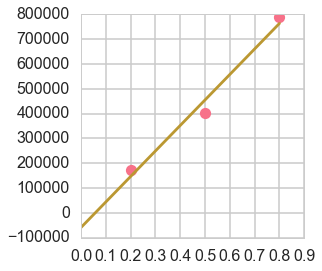

In [14]:
%matplotlib inline
def calc_rs(r_list, wl_list=[1./0.2, 1./0.5, 1./0.8], thickness=1):
    """calculte sheet resistance
    
    Args:
    r_list: list of float, list of resitance in Ohm.
    wl_list: list of float, list of W/L
    thickness: float, thickness in [nm]. If 1, conductivity calculation will not be done.
    
    Ret:
    rs: float, Sheet resistance [Ohm/sq]
    rc: float, contact resistance [Ohm]
    cond: float, conductivity [S/cm], only if thickness is not 1.
    """
    r = np.array(r_list)
    wl = np.array(wl_list)
    
    f, ax = plt.subplots(figsize=(4,4))
    ax.plot(1/wl, r, 'o')
    z = np.polyfit(1/wl, r, 1)
    rs, rc = z[0], z[1] #[Ohm/sq], [Ohm]
    
    lw = np.array([0, (1/wl).max()])
    r_fit = lw * rs + rc
    
    ax.plot(lw, r_fit)
    
    if thickness == 1:
        print 'Rs = %e [Ohm/sq], Rc = %e [Ohm]' %(rs, rc)
        return rs, rc
        
    else:
        cond = (1 / rs) / (thickness * 1e-7) #[S/cm]
        print 'Rs = %0.2e [Ohm/sq], Rc = %0.2e [Ohm]\nRho = %0.2e [S/cm]' %(rs, rc, cond)
        return rs, rc, cond
        
wl_list = [1./0.2, 1./0.5, 1./0.8]
r_list = [1.73e+05, 4.02e+05, 7.90e+05]
r, rc, c = calc_rs(r_list, wl_list, 65)

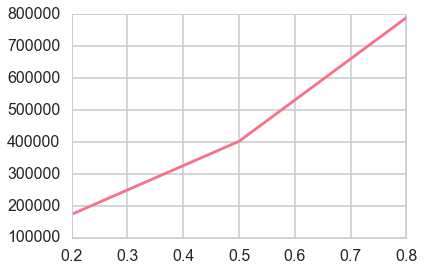

In [5]:
wl_list = [1./0.2, 1./0.5, 1./0.8]
r_list = [1.73e+05, 4.02e+05, 7.90e+05]
plt.plot(1/np.array(wl_list), np.array(r_list))